In [1]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
matplotlib.rc('text', usetex=True)
matplotlib.rcParams.update({"font.size":16})

from src.util import read_json, sma
from config import config


In [8]:
agent = str(0)

results_dir = config.resultsDir+'/FrozenLake-v0/ThompsonTabularQFunction/'+agent
#results_dir = config.resultsDir+'/FrozenLake-v0/TabularQFunction/'+agent
#results_dir = config.resultsDir+'/NChain-v0/ThompsonTabularQFunction/'+agent
#results_dir = config.resultsDir+'/CartPole-v0/ThompsonPreprocessedQFunction/'+agent
#results_dir = config.resultsDir+'/MountainCar-v0/ThompsonPreprocessedQFunction/'+agent

In [9]:
episodes = sorted(os.listdir(results_dir),key=lambda x: int(x))

In [10]:
steps = []
for e in episodes:
    d = results_dir + '/' + e
    files = os.listdir(d)

    steps.append([])
    for f in files:
        fn = d+'/'+f
        j = read_json(fn)
        steps[-1].append(j)

In [11]:
rewards = []
for s in steps:
    R = np.sum([d['r'] for d in s])
    rewards.append(R)
    
rewards_avg = sma(rewards,100)

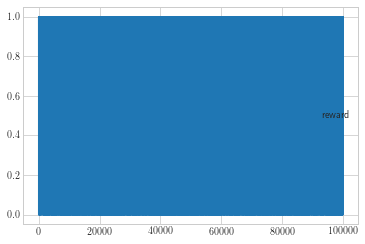

In [12]:
plt.figure()
plt.plot(rewards,label='reward')
plt.legend()
plt.show()
plt.close()

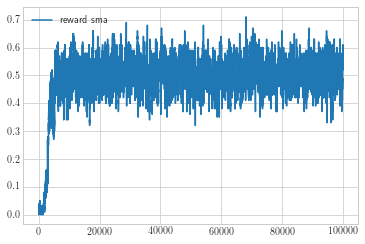

In [13]:
plt.figure()
plt.plot(rewards_avg,label='reward sma')
plt.legend()
plt.show()
plt.close()